In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install folium 

In [51]:
df_2023 = pd.read_csv(r'C:\Users\Reet\Downloads\dataset\Time_series\Airbnb\dataset\AB_US_2023.csv')

C:\Users\Reet\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [52]:
df_2023.head(5)

id                                               name  host_id  \
0   958              Bright, Modern Garden Unit - 1BR/1BTH     1169   
1  5858                                 Creative Sanctuary     8904   
2  8142  Friendly Room Apt. Style -UCSF/USF - San Franc...    21994   
3  8339                    Historic Alamo Square Victorian    24215   
4  8739                Mission Sunshine, with Private Bath     7149   

          host_name neighbourhood_group     neighbourhood  latitude  \
0             Holly                 NaN  Western Addition  37.77028   
1  Philip And Tania                 NaN    Bernal Heights  37.74474   
2             Aaron                 NaN    Haight Ashbury  37.76555   
3              Rosy                 NaN  Western Addition  37.77564   
4      Ivan & Wendy                 NaN           Mission  37.76030   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0 -122.43317  Entire home/apt    202               2                383   
1 -122.42089  Entire home/apt    235              30                111   
2 -122.45213     Private room     56              32                  9   
3 -122.43642  Entire home/apt    575               9                 28   
4 -122.42197     Private room    110               1                770   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2023-02-19               2.31                               1   
1  2017-08-06               0.66                               1   
2  2022-10-27               0.09                              13   
3  2019-06-28               0.17                               2   
4  2023-02-25               4.65                               2   

   availability_365  number_of_reviews_ltm           city  
0               128                     59  San Francisco  
1               365                      0  San Francisco  
2               365                      1  San Francisco  
3               365                      0  San Francisco  
4               159                     34  San Francisco

<AxesSubplot:>

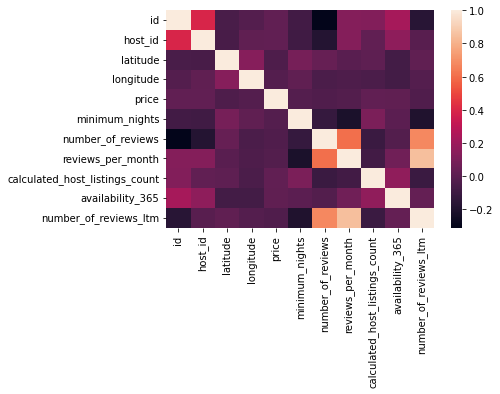

In [53]:
sns.heatmap(df_2023.corr())

In [54]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 

df_2023 = df_2023.dropna()
df_2023.head()

df_2023 = df_2023.drop(['neighbourhood_group'], axis=1)

In [55]:
df_2023['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [56]:
df_2023['city'].unique()

array(['Los Angeles', 'New York City', 'Rhode Island', 'Seattle'],
      dtype=object)

In [57]:
df_2023.head()

id                                               name  \
24260  770565020594037590                    Phillips Ranch room with a view   
24262  698097753730921190                                             方便易居驿站   
24263            13063118  TERRANEA OCEANFRNT 1BR CASITA -203 RSRT AMENIT...   
24264            39337076          Brand New Duplex Near World Cruise Center   
24265            13077628                                Zuma Malibu Retreat   

         host_id host_name        neighbourhood   latitude   longitude  \
24260   30603612  Yamileth               Pomona  34.031856 -117.777994   
24262  444692513     Hanna               Pomona  34.048480 -117.768870   
24263   41736985      Beth  Rancho Palos Verdes  33.738420 -118.395800   
24264  208375458       Jae  Rancho Palos Verdes  33.748420 -118.311000   
24265    4182067    Jeremy               Malibu  34.039790 -118.868850   

             room_type  price  minimum_nights  number_of_reviews last_review  \
24260     Private room     61               5                  1  2022-12-26   
24262     Private room     46               3                  5  2023-01-16   
24263     Private room    408               3                 53  2022-11-26   
24264     Private room     80               2                 44  2023-02-24   
24265  Entire home/apt   2138               7                 15  2018-07-30   

       reviews_per_month  calculated_host_listings_count  availability_365  \
24260               0.42                               5                27   
24262               0.86                               4                87   
24263               0.64                              10               270   
24264               1.09                               4               357   
24265               0.18                               1               358   

       number_of_reviews_ltm         city  
24260                      1  Los Angeles  
24262                      5  Los Angeles  
24263                     13  Los Angeles  
24264                     26  Los Angeles  
24265                      0  Los Angeles

In [58]:
df_2023.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'city'],
      dtype='object')

In [34]:
# for i in range(1,68):
#     df_2023[df_2023.columns[i]].fillna(value=df_2023[df_2023.columns[i]].mean() ,inplace=True)

# df_2023['reviews_per_month'].mean()

# df_2023[df_2023['reviews_per_month']].fillna(value=df_2023[df_2023['reviews_per_month']].mean() ,inplace=True)
    

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_2023['room_type'] = df_2023['room_type'].map({'Private room':0, 'Entire home/apt':1, 'Shared room':2, 'Hotel room':3})
df_2023['city'] = df_2023['city'].map({'Los Angeles':0, 'New York City':1, 
                                       'Rhode Island':2, 'Seattle':3, 'San Francisco':4,'Washington D.C.':5,
                                      'Oakland':6,'Jersey City':7,'New Orleans':8,'Cambridge':9,'Santa Clara County':10,
                                      'Asheville':11,'Salem':12,'Columbus':13,'Rhode Island':14, 'San Diego':15,
                                      'Nashville':16, 'Santa Cruz County':17, 'Denver':18, 'Chicago':19, 'Austin':20,'Pacific Grove':21,
                                      'Portland':22,'Seattle':23,'Twin Cities MSA':24, 'Broward County':25,'Clark County':26,
                                      'Boston':27, 'San Mateo County':28})

X = df_2023[['room_type', 'city', 'minimum_nights','number_of_reviews',
             'availability_365','reviews_per_month','calculated_host_listings_count','number_of_reviews_ltm']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                          feature       VIF
0                       room_type  2.133635
1                            city  1.215474
2                  minimum_nights  1.277353
3               number_of_reviews  2.193880
4                availability_365  1.991041
5               reviews_per_month  5.657202
6  calculated_host_listings_count  1.073528
7           number_of_reviews_ltm  5.135332


In [63]:
x1 = df_2023[['room_type', 'availability_365','city','number_of_reviews', 'minimum_nights',
              'number_of_reviews','calculated_host_listings_count','number_of_reviews_ltm']]
x1 = x1.values
y1 = df_2023[['price']]
y1 = y1.values

In [64]:
df_2023.isna()

id   name  host_id  host_name  neighbourhood  latitude  longitude  \
24260   False  False    False      False          False     False      False   
24262   False  False    False      False          False     False      False   
24263   False  False    False      False          False     False      False   
24264   False  False    False      False          False     False      False   
24265   False  False    False      False          False     False      False   
...       ...    ...      ...        ...            ...       ...        ...   
189443  False  False    False      False          False     False      False   
189445  False  False    False      False          False     False      False   
189446  False  False    False      False          False     False      False   
189447  False  False    False      False          False     False      False   
189448  False  False    False      False          False     False      False   

        room_type  price  minimum_nights  number_of_reviews  last_review  \
24260       False  False           False              False        False   
24262       False  False           False              False        False   
24263       False  False           False              False        False   
24264       False  False           False              False        False   
24265       False  False           False              False        False   
...           ...    ...             ...                ...          ...   
189443      False  False           False              False        False   
189445      False  False           False              False        False   
189446      False  False           False              False        False   
189447      False  False           False              False        False   
189448      False  False           False              False        False   

        reviews_per_month  calculated_host_listings_count  availability_365  \
24260               False                           False             False   
24262               False                           False             False   
24263               False                           False             False   
24264               False                           False             False   
24265               False                           False             False   
...                   ...                             ...               ...   
189443              False                           False             False   
189445              False                           False             False   
189446              False                           False             False   
189447              False                           False             False   
189448              False                           False             False   

        number_of_reviews_ltm   city  
24260                   False  False  
24262                   False  False  
24263                   False  False  
24264                   False  False  
24265                   False  False  
...                       ...    ...  
189443                  False  False  
189445                  False  False  
189446                  False  False  
189447                  False  False  
189448                  False  False  

[72598 rows x 17 columns]

## Linear Regression Price prediction

In [78]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25, random_state=1) 
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print("Intercept: ", regr.intercept_)
print("Coefficients:")
list(zip(X, regr.coef_))
y_pred= regr.predict(X_test)
print("Prediction for test set: {}".format(y_pred))

meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(regr.score(x1,y1)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)



Intercept:  [137.40925916]
Coefficients:
Prediction for test set: [[245.01115311]
 [254.83639689]
 [230.42604496]
 ...
 [210.00158023]
 [268.81361525]
 [239.55675401]]
R squared: 0.57
Mean Absolute Error: 145.64339320501858
Mean Square Error: 1142844.4794956876
Root Mean Square Error: 1069.0390448882995


In [91]:
X.dtypes

id                                   int64
name                              category
host_id                              int64
host_name                         category
neighbourhood                     category
latitude                           float64
longitude                          float64
room_type                            int64
minimum_nights                       int64
number_of_reviews                    int64
last_review                       category
reviews_per_month                  float64
calculated_host_listings_count       int64
availability_365                     int64
number_of_reviews_ltm                int64
city                                 int64
dtype: object

In [92]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [81]:
airbnb=df_2023[["latitude","longitude","price"]]
min_price=df_2023["price"].min()
max_price=df_2023["price"].max()
df_2023["price"].describe().to_frame()

price
count  72598.000000
mean     211.929915
std      942.084009
min        0.000000
25%       85.000000
50%      134.000000
75%      218.000000
max    99000.000000

In [108]:
print(df_2023['latitude'].mean())
print(df_2023['longitude'].mean())

38.44472578795986
-96.14007521083512


In [150]:
# from folium import plugins
# m = folium.Map([38.444 ,-96.1400], zoom_start=5,width="%100",height="%100")
# locations = list(zip(df_2023.latitude, df_2023.longitude))
# cluster = plugins.MarkerCluster(locations=locations,                     
#                popups=df_2023["neighbourhood"].tolist())  
# m.add_child(cluster)
# m


In [149]:
# m = folium.Map(location=[38.444 ,-96.1400],width="%100",height="%100")
# for i in range(len(locations)):
#     folium.CircleMarker(location=locations[i],radius=1).add_to(m)
# m


In [167]:
# import branca.colormap as cm
# m = folium.Map(location=[38.444 ,-96.1400],width="%100",height="%100")
# colormap = cm.StepColormap(colors=['green','yellow','orange','red'] ,#renkler
#                            index=[min_price,85,134,218,max_price], #eşik değerler
#                            vmin= min_price,
#                            vmax=max_price)

# for loc, p in zip(zip(df_2023["latitude"],df_2023["longitude"]),df_2023["price"]):
#       folium.Circle(
#       location=loc,
#       radius=2, #yarıçap
#       fill=True, 
#       color=colormap(p)
# ).add_to(m)
# m

